In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import pandas as pd

In [2]:
prize_prob = 0.045

result = np.random.choice(np.arange(0, 4), 
                          p=[prize_prob, prize_prob, prize_prob, 1-prize_prob*3], 
                          size=(10000))

In [3]:
idx, counts = np.unique(result, return_counts=True)
idx, counts

(array([0, 1, 2, 3]), array([ 424,  438,  472, 8666]))

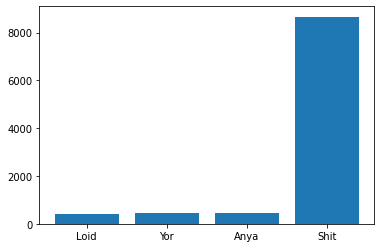

In [4]:
plt.bar(["Loid", "Yor", "Anya", "Shit"], counts)
plt.show()

In [32]:
# 停止抽卡條件:三大獎都有
# exchanged: 百搭卡數
# pool: 目前已抽卡池
def stop(pool, exchanged):
    obtained = exchanged + sum(1 for i in range(3) if pool[i]>0)
    return obtained >= 3

# 停止抽卡條件: 抽到大獎
def stop_first(pool):
    return pool[0] > 0
# 停止抽卡條件: 抽到全部大獎
def stop_all(pool):
    return pool[0] > 0 and pool[1] > 0 and pool[2] > 0

def draw(prize_prob):
    if isinstance(prize_prob, float):
        result = np.random.choice(np.arange(0, 4), 
                                p=[prize_prob, prize_prob, prize_prob, 1-prize_prob*3])
    elif isinstance(prize_prob, list):
        probs = list(prize_prob)
        probs.append(1-sum(probs))
        result = np.random.choice(np.arange(0, 4), 
                                  p=probs)
    return result

# 家家酒抽卡
def draw_round(prize_prob):
    draw_id = 0
    pool = [0, 0, 0, 0]
    coins = 100
    exchanged = 0

    while(not stop(pool, exchanged)):
        card_id = draw(prize_prob)
        draw_id += 1
        coins += 10
        pool[card_id] += 1
        if draw_id % 10 == 0:
            coins += 30
        
        if stop(pool, exchanged):
            return draw_id, pool

        if coins == 250:
            exchanged += 1
            coins -= 250
    return draw_id, pool

# 一般抽卡
def draw_round_simple(prize_prob, stop_criterion):
    draw_id = 0
    pool = [0, 0, 0, 0]

    while(not stop_criterion(pool)):
        card_id = draw(prize_prob)
        draw_id += 1
        pool[card_id] += 1
        
        if draw_id % 40 == 0:
            pool[0] += 1
    return draw_id, pool

In [ ]:
probs = [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009 ,0.01, 0.015, 0.02, 0.03, 0.045, 0.05, 0.1]
ROUNDS = 10000
avg_stones = []

for p in probs:
    total_stones = 0    
    for i in tqdm(range(ROUNDS)):
        draw_times, _ = draw_round(p)
        stones = draw_times * 5
        total_stones += stones

    avg_stones.append(total_stones / ROUNDS )

In [33]:
# 一般合作

ROUNDS = 10000
total_stones = 0    
for i in tqdm(range(ROUNDS)):
    draw_times, _ = draw_round_simple([0.025, 0.1, 0.1], stop_all)
    stones = draw_times * 5
    total_stones += stones

total_stones / ROUNDS

# 72.4 : first only
# 144.604: all

  0%|          | 0/10000 [00:00<?, ?it/s]

144.604

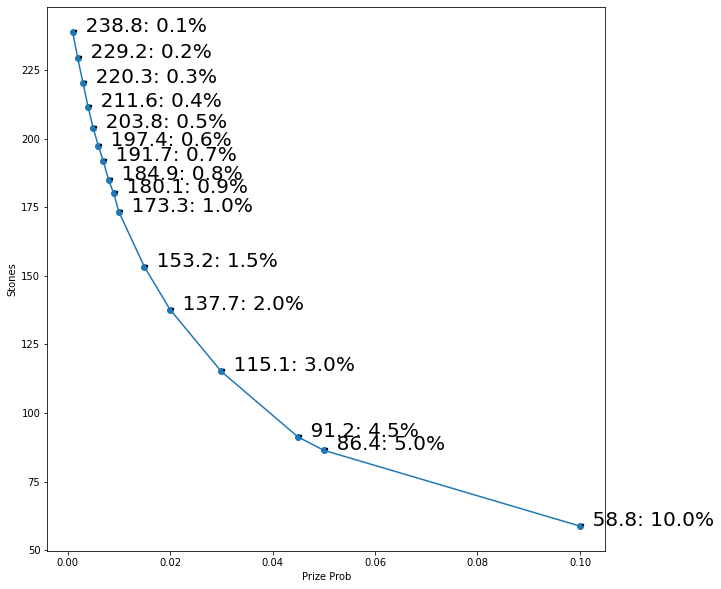

In [18]:
plt.figure(figsize=(10, 10))
plt.plot(probs, avg_stones, marker="o")
for a,b in zip(probs, avg_stones): 
    plt.text(a, b, f'. {b:.1f}: {a*100:.1f}%', fontsize=20)
plt.xlabel('Prize Prob')
plt.ylabel('Stones')
plt.show()

In [17]:
df = pd.DataFrame({"大獎機率(%)": probs, 
                   "平均石頭": avg_stones})
df["大獎機率(%)"] *= 100
df["平均抽"] = df["平均石頭"] / 5
df
# for p, s in zip(probs, avg_stones):
#     print(p, s)

,大獎機率(%),平均石頭,平均抽
0,0.1,238.8390,47.7678
1,0.2,229.1755,45.8351
2,0.3,220.3160,44.0632
3,0.4,211.5660,42.3132
4,0.5,203.7500,40.7500
5,0.6,197.3915,39.4783
6,0.7,191.6595,38.3319
7,0.8,184.8565,36.9713
8,0.9,180.0995,36.0199
9,1.0,173.3250,34.6650
